[the paper](https://onlinelibrary.wiley.com/doi/10.1107/S0365110X67000970)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sympy
from sympy import *
from sympy.ntheory import binomial_coefficients_list
from galgebra import *
from galgebra.ga import Ga
from galgebra.mv import cross
from galgebra.printer import latex
from IPython.display import Math

# tell sympy to use latex printing by default
sympy.init_printing(latex_printer=latex, use_latex="mathjax")

# use galgebra vectors and operations even though
# everything in this notebook will be vector algebra
xyz = (x, y, z) = sympy.symbols("x y z", real=True)
o3d = Ga("e_1 e_2 e_3", g=[1, 1, 1], coords=xyz)

# Definition of diffractometer angles

define lattice vectors (a1, a2, a3) and reciprocal lattice vectors (b1, b2, b3)

In [2]:
e1, e2, e3 = o3d.mv()
(a1_1, a1_2, a1_3) = sympy.symbols("a1_1 a1_2 a1_3", real=True)
(a2_1, a2_2, a2_3) = sympy.symbols("a2_1 a2_2 a2_3", real=True)
(a3_1, a3_2, a3_3) = sympy.symbols("a3_1 a3_2 a3_3", real=True)

a1 = a1_1*e1 + a1_2*e2 + a1_3*e3
a2 = a2_1*e1 + a2_2*e2 + a2_3*e3
a3 = a3_1*e1 + a3_2*e2 + a3_3*e3

b1 = cross(a2, a3) / (a1|cross(a2, a3))
b2 = cross(a3, a1) / (a2|cross(a3, a1))
b3 = cross(a1, a2) / (a3|cross(a1, a2))

def get_vector_coefficients(multivector):
    # return only the coefficients of e1, e2, e3
    return [c for c in multivector.blade_coefs()[1:4]]

b1_1, b1_2, b1_3 = get_vector_coefficients(b1)
b2_1, b2_2, b2_3 = get_vector_coefficients(b2)
b3_1, b3_2, b3_3 = get_vector_coefficients(b3)

define angles between lattice vectors (alpha1, alpha2, alpha3)

In [3]:
alpha1 = acos( (a2|a3).obj / (a2.norm()*a3.norm()) )
alpha2 = acos( (a3|a1).obj / (a3.norm()*a1.norm()) )
alpha3 = acos( (a1|a2).obj / (a1.norm()*a2.norm()) )

In [4]:
alpha1

    ⎛          a₂ ₁⋅a₃ ₁ + a₂ ₂⋅a₃ ₂ + a₂ ₃⋅a₃ ₃          ⎞
acos⎜─────────────────────────────────────────────────────⎟
    ⎜   _______________________    _______________________⎟
    ⎜  ╱     2       2       2    ╱     2       2       2 ⎟
    ⎝╲╱  a₂ ₁  + a₂ ₂  + a₂ ₃  ⋅╲╱  a₃ ₁  + a₃ ₂  + a₃ ₃  ⎠

define angles between reciprocal lattice vectors (beta1, beta2, beta3)

In [5]:
# norm2() is used here because norm() would not work with 
# the reciprocal lattice vectors (why?)
beta1 = acos( (b2|b3).obj / sqrt(b2.norm2()*b3.norm2()) )
beta2 = acos( (b3|b1).obj / sqrt(b3.norm2()*b1.norm2()) )
beta3 = acos( (b1|b2).obj / sqrt(b1.norm2()*b2.norm2()) )

In [6]:
# just trying to make b1.norm2() look nice
sqrt(factor(simplify(b1.norm2())))

      ________________________________________________________________________
     ╱     2     2       2     2                                              
    ╱  a₂ ₁ ⋅a₃ ₂  + a₂ ₁ ⋅a₃ ₃  - 2⋅a₂ ₁⋅a₂ ₂⋅a₃ ₁⋅a₃ ₂ - 2⋅a₂ ₁⋅a₂ ₃⋅a₃ ₁⋅a₃
   ╱   ───────────────────────────────────────────────────────────────────────
  ╱                                                                           
╲╱                               (a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅

______________________________________________________________________________
         2     2       2     2                               2     2       2  
 ₃ + a₂ ₂ ⋅a₃ ₁  + a₂ ₂ ⋅a₃ ₃  - 2⋅a₂ ₂⋅a₂ ₃⋅a₃ ₂⋅a₃ ₃ + a₂ ₃ ⋅a₃ ₁  + a₂ ₃ ⋅a
──────────────────────────────────────────────────────────────────────────────
                                                        2                     
a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁)                      

_____
   2 
₃ ₂  
──── 
     
     

In [7]:
simplify(b1_1)

                                       a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂                  
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [8]:
simplify(b1_2)

                                       -a₂ ₁⋅a₃ ₃ + a₂ ₃⋅a₃ ₁                 
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [9]:
simplify(b1_3)

                                       a₂ ₁⋅a₃ ₂ - a₂ ₂⋅a₃ ₁                  
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [10]:
simplify(b2_1)

                                       -a₁ ₂⋅a₃ ₃ + a₁ ₃⋅a₃ ₂                 
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [11]:
simplify(b2_2)

                                       a₁ ₁⋅a₃ ₃ - a₁ ₃⋅a₃ ₁                  
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [12]:
simplify(b2_3)

                                       -a₁ ₁⋅a₃ ₂ + a₁ ₂⋅a₃ ₁                 
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [13]:
simplify(b3_1)

                                       a₁ ₂⋅a₂ ₃ - a₁ ₃⋅a₂ ₂                  
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [14]:
b3_2 = simplify(b3_2)
b3_2

                                       -a₁ ₁⋅a₂ ₃ + a₁ ₃⋅a₂ ₁                 
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [15]:
b3_3 = simplify(b3_3)
b3_3

                                       a₁ ₁⋅a₂ ₂ - a₁ ₂⋅a₂ ₁                  
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [16]:
def plot_lattice_vectors(u1, u2, u3, ax):
    # place u1, u2, u3 at the origin

    # draw a line from (x01, x02, x03) to (x11, x12, x13)
    # put coordinates into an array like this
    #   x01  x11
    #   x02  x12
    #   x03  x13
    u1_coords = np.zeros((3, 2))
    u1_coords[:, 1] = get_vector_coefficients(u1)
    u2_coords = np.zeros((3, 2))
    u2_coords[:, 1] = get_vector_coefficients(u2)
    u3_coords = np.zeros((3, 2))
    u3_coords[:, 1] = get_vector_coefficients(u3)

    ax.plot(u1_coords[0, :], u1_coords[1, :], u1_coords[2, :], c='r')
    ax.plot(u2_coords[0, :], u2_coords[1, :], u2_coords[2, :], c='g')
    ax.plot(u3_coords[0, :], u3_coords[1, :], u3_coords[2, :], c='b')



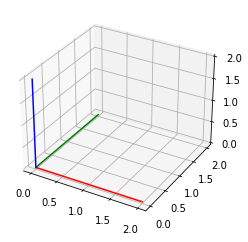

In [17]:
cubic_lattice = [
    (a1_1, 2), (a1_2, 0), (a1_3, 0),
    (a2_1, 0), (a2_2, 2), (a2_3, 0),
    (a3_1, 0), (a3_2, 0), (a3_3, 2),
]
cubic_a1 = a1.subs(cubic_lattice)
cubic_a2 = a2.subs(cubic_lattice)
cubic_a3 = a3.subs(cubic_lattice)

ax = plt.figure().add_subplot(projection='3d')
plot_lattice_vectors(cubic_a1, cubic_a2, cubic_a3, ax)
plt.show()

do some tests

In [18]:
print(f"alpha_1: {alpha1.subs(cubic_lattice).evalf()}")
print(f"alpha_2: {alpha2.subs(cubic_lattice).evalf()}")
print(f"alpha_3: {alpha3.subs(cubic_lattice).evalf()}")

alpha_1: 1.57079632679490
alpha_2: 1.57079632679490
alpha_3: 1.57079632679490


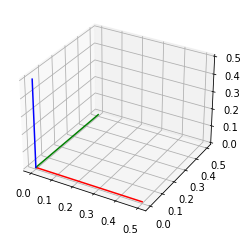

In [19]:
cubic_b1 = b1.subs(cubic_lattice)
cubic_b2 = b2.subs(cubic_lattice)
cubic_b3 = b3.subs(cubic_lattice)

ax = plt.figure().add_subplot(projection='3d')
plot_lattice_vectors(cubic_b1, cubic_b2, cubic_b3, ax)
plt.show()

In [20]:
print(f"beta_1: {beta1.subs(cubic_lattice).evalf()}")
print(f"beta_2: {beta2.subs(cubic_lattice).evalf()}")
print(f"beta_3: {beta3.subs(cubic_lattice).evalf()}")

beta_1: 1.57079632679490
beta_2: 1.57079632679490
beta_3: 1.57079632679490


Coordinate transformations

In [21]:
(v1, v2, v3) = sympy.symbols("v1 v2 v3", real=True)
v = (v1*b1) + (v2*b2) + (v3*b3)
collect(simplify(v.obj), (v1, v2, v3))

v₁⋅(a₂ ₁⋅a₃ ₂⋅e₃ - a₂ ₁⋅a₃ ₃⋅e₂ - a₂ ₂⋅a₃ ₁⋅e₃ + a₂ ₂⋅a₃ ₃⋅e₁ + a₂ ₃⋅a₃ ₁⋅e₂ -
──────────────────────────────────────────────────────────────────────────────
                                                                              

 a₂ ₃⋅a₃ ₂⋅e₁) + v₂⋅(-a₁ ₁⋅a₃ ₂⋅e₃ + a₁ ₁⋅a₃ ₃⋅e₂ + a₁ ₂⋅a₃ ₁⋅e₃ - a₁ ₂⋅a₃ ₃⋅e
──────────────────────────────────────────────────────────────────────────────
              a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ 

₁ - a₁ ₃⋅a₃ ₁⋅e₂ + a₁ ₃⋅a₃ ₂⋅e₁) + v₃⋅(a₁ ₁⋅a₂ ₂⋅e₃ - a₁ ₁⋅a₂ ₃⋅e₂ - a₁ ₂⋅a₂ ₁
──────────────────────────────────────────────────────────────────────────────
₁ + a₁ ₃⋅a₂ ₁⋅a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁                                           

⋅e₃ + a₁ ₂⋅a₂ ₃⋅e₁ + a₁ ₃⋅a₂ ₁⋅e₂ - a₁ ₃⋅a₂ ₂⋅e₁)
─────────────────────────────────────────────────
                                                 

The "crystal cartesian axes" x,y,z are attached to b1, b2, b3 like this:
  - the x-axis is parallel to b1
    - b1_2 = 0
    - b1_3 = 0
  - the y-axis is in the b1-b2 plane
    - b2_3 = 0
  - the z-axis is perpendicular to the x-y plane (as usual)

In [22]:
crystal_cartesian_orientation = [
    (b1_2, 0), (b1_3, 0),
    (b2_3, 0)
]

In [23]:
# compare general b1 with b1 in crystal cartesian orientation
simplify(b1.obj)

       (a₂ ₁⋅a₃ ₂ - a₂ ₂⋅a₃ ₁)⋅e₃ + (-a₂ ₁⋅a₃ ₃ + a₂ ₃⋅a₃ ₁)⋅e₂ + (a₂ ₂⋅a₃ ₃ -
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

 a₂ ₃⋅a₃ ₂)⋅e₁       
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [24]:
simplify(b1.subs(crystal_cartesian_orientation).obj)

                                     (a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂)⋅e₁               
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [25]:
# compare general b2 with b2 in crystal cartesian orientation
simplify(b2.obj)

       (-a₁ ₁⋅a₃ ₂ + a₁ ₂⋅a₃ ₁)⋅e₃ + (a₁ ₁⋅a₃ ₃ - a₁ ₃⋅a₃ ₁)⋅e₂ + (-a₁ ₂⋅a₃ ₃ 
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

+ a₁ ₃⋅a₃ ₂)⋅e₁      
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [26]:
simplify(b2.subs(crystal_cartesian_orientation).obj)

                      (a₁ ₁⋅a₃ ₃ - a₁ ₃⋅a₃ ₁)⋅e₂ + (-a₁ ₂⋅a₃ ₃ + a₁ ₃⋅a₃ ₂)⋅e₁
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [27]:
# compare general b3 with b3 in crystal cartesian orientation
simplify(b3.obj)

       (a₁ ₁⋅a₂ ₂ - a₁ ₂⋅a₂ ₁)⋅e₃ + (-a₁ ₁⋅a₂ ₃ + a₁ ₃⋅a₂ ₁)⋅e₂ + (a₁ ₂⋅a₂ ₃ -
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

 a₁ ₃⋅a₂ ₂)⋅e₁       
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [28]:
simplify(b3.subs(crystal_cartesian_orientation).obj)

       (a₁ ₁⋅a₂ ₂ - a₁ ₂⋅a₂ ₁)⋅e₃ + (-a₁ ₁⋅a₂ ₃ + a₁ ₃⋅a₂ ₁)⋅e₂ + (a₁ ₂⋅a₂ ₃ -
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

 a₁ ₃⋅a₂ ₂)⋅e₁       
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [29]:
# compare general v with v in crystal cartesian orientation
# this does not seem to work - no simplification happens here
collect(simplify(v.obj), (v1, v2, v3))

v₁⋅(a₂ ₁⋅a₃ ₂⋅e₃ - a₂ ₁⋅a₃ ₃⋅e₂ - a₂ ₂⋅a₃ ₁⋅e₃ + a₂ ₂⋅a₃ ₃⋅e₁ + a₂ ₃⋅a₃ ₁⋅e₂ -
──────────────────────────────────────────────────────────────────────────────
                                                                              

 a₂ ₃⋅a₃ ₂⋅e₁) + v₂⋅(-a₁ ₁⋅a₃ ₂⋅e₃ + a₁ ₁⋅a₃ ₃⋅e₂ + a₁ ₂⋅a₃ ₁⋅e₃ - a₁ ₂⋅a₃ ₃⋅e
──────────────────────────────────────────────────────────────────────────────
              a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ 

₁ - a₁ ₃⋅a₃ ₁⋅e₂ + a₁ ₃⋅a₃ ₂⋅e₁) + v₃⋅(a₁ ₁⋅a₂ ₂⋅e₃ - a₁ ₁⋅a₂ ₃⋅e₂ - a₁ ₂⋅a₂ ₁
──────────────────────────────────────────────────────────────────────────────
₁ + a₁ ₃⋅a₂ ₁⋅a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁                                           

⋅e₃ + a₁ ₂⋅a₂ ₃⋅e₁ + a₁ ₃⋅a₂ ₁⋅e₂ - a₁ ₃⋅a₂ ₂⋅e₁)
─────────────────────────────────────────────────
                                                 

In [30]:
collect(simplify(v.subs(crystal_cartesian_orientation).obj), (v1, v2, v3))

(v₁⋅(a₂ ₁⋅a₃ ₂ - a₂ ₂⋅a₃ ₁) + v₂⋅(-a₁ ₁⋅a₃ ₂ + a₁ ₂⋅a₃ ₁) + v₃⋅(a₁ ₁⋅a₂ ₂ - a₁
──────────────────────────────────────────────────────────────────────────────
                                                                              

 ₂⋅a₂ ₁))⋅e₃ + (v₁⋅(-a₂ ₁⋅a₃ ₃ + a₂ ₃⋅a₃ ₁) + v₂⋅(a₁ ₁⋅a₃ ₃ - a₁ ₃⋅a₃ ₁) + v₃⋅
──────────────────────────────────────────────────────────────────────────────
           a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ +

(-a₁ ₁⋅a₂ ₃ + a₁ ₃⋅a₂ ₁))⋅e₂ + (v₁⋅(a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂) + v₂⋅(-a₁ ₂⋅a₃ ₃ + 
──────────────────────────────────────────────────────────────────────────────
 a₁ ₃⋅a₂ ₁⋅a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁                                              

a₁ ₃⋅a₃ ₂) + v₃⋅(a₁ ₂⋅a₂ ₃ - a₁ ₃⋅a₂ ₂))⋅e₁
───────────────────────────────────────────
                                           

In [31]:
v_c = v1*b1.subs(crystal_cartesian_orientation) + v2*b2.subs(crystal_cartesian_orientation) + v3*b3.subs(crystal_cartesian_orientation)
v_c

(a1_2*a2_3*v3 - a1_2*a3_3*v2 - a1_3*a2_2*v3 + a1_3*a3_2*v2 + a2_2*a3_3*v1 - a2_3*a3_2*v1)*e_1/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1) + (-a1_1*a2_3*v3 + a1_1*a3_3*v2 + a1_3*a2_1*v3 - a1_3*a3_1*v2)*e_2/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1) + v3*(a1_1*a2_2 - a1_2*a2_1)*e_3/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)

In [32]:
v_c_x = v_c|e1
simplify(collect(v_c_x.obj, (v1, v2, v3)))

        v₁⋅(a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂) - v₂⋅(a₁ ₂⋅a₃ ₃ - a₁ ₃⋅a₃ ₂) + v₃⋅(a₁ ₂⋅a₂ 
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

₃ - a₁ ₃⋅a₂ ₂)       
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [33]:
v_c_y = v_c|e2
simplify(collect(v_c_y.obj, (v1, v2, v3)))

                      v₂⋅(a₁ ₁⋅a₃ ₃ - a₁ ₃⋅a₃ ₁) - v₃⋅(a₁ ₁⋅a₂ ₃ - a₁ ₃⋅a₂ ₁) 
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [34]:
v_c_z = v_c|e3
simplify(collect(v_c_z.obj, (v1, v2, v3)))

                                     v₃⋅(a₁ ₁⋅a₂ ₂ - a₁ ₂⋅a₂ ₁)               
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

In [35]:
simplify(v_c_x.obj.coeff(v1))

                                       a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂                  
──────────────────────────────────────────────────────────────────────────────
a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ ₁⋅

                     
─────────────────────
a₃ ₂ - a₁ ₃⋅a₂ ₂⋅a₃ ₁

This B uses crystal cartesian orientation.

In [36]:
B = Matrix([
    [simplify(v_c_x.obj.coeff(v1)), simplify(v_c_x.obj.coeff(v2)), simplify(v_c_x.obj.coeff(v3))],
    [simplify(v_c_y.obj.coeff(v1)), simplify(v_c_y.obj.coeff(v2)), simplify(v_c_y.obj.coeff(v3))],
    [simplify(v_c_z.obj.coeff(v1)), simplify(v_c_z.obj.coeff(v2)), simplify(v_c_z.obj.coeff(v3))],
])
B

Matrix([
[(a2_2*a3_3 - a2_3*a3_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1), (-a1_2*a3_3 + a1_3*a3_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1),  (a1_2*a2_3 - a1_3*a2_2)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)],
[                                                                                                                            0,  (a1_1*a3_3 - a1_3*a3_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1), (-a1_1*a2_3 + a1_3*a2_1)/(a1_1*a2_2*a3_3 - a1_1*a2_3*a3_2 - a1_2*a2_1*a3_3 + a1_2*a2_3*a3_1 + a1_3*a2_1*a3_2 - a1_3*a2_2*a3_1)],
[                                                                                                                            0,                                                                                              

This B is for a cubic lattice with lattice vectors of length 2.

In [37]:
B_cubic = B.subs(cubic_lattice)
B_cubic

Matrix([
[1/2,   0,   0],
[  0, 1/2,   0],
[  0,   0, 1/2]])